In [7]:
import numpy as np
from matplotlib import pyplot as plt

from qepy.calculator import QEpyCalculator 
from qepy.io import QEInput
from qepy.driver import Driver

from ase.build import bulk
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal
from ase import Atoms
import ase.io

try:
    from mpi4py import MPI
    comm=MPI.COMM_WORLD
except:
    comm=None

qe_options = {
        '&control': {
            'calculation': "'scf'",
            'prefix': "'si'",
            'pseudo_dir': "'/home/valeria/Desktop/programs/dftpy/examples/ofpp/EAC/upf/blps/'",
            'restart_mode': "'from_scratch'"},
        '&system': {
            'ibrav' : 1,
            'nat': 2,
            'degauss': 0.005,
            'ecutwfc': 60,
            'occupations': "'smearing'"},
        'atomic_species': ['Si  28.08 si.lda.upf'],
        'cell_parameters angstrom': ['5.43    0.0000000000000000    0.0000000000000003',
                                     '0.0000000000000009    5.43    0.0000000000000003',
                                     '0.0000000000000000    0.0000000000000000    5.43'],
         'k_points automatic': ['20 20 20 1 1 1']}

# KS DFT

l = np.linspace(0.8, 1.4, 30)
ks_ke = []
for i in np.arange(0, len(l), 1):
        n = int(i)
        X = l[n]
        inputfile = 'bct5.vasp'
        si = ase.io.read(inputfile, format='vasp')
        cell = si.get_cell()
        si.set_cell(cell * X, scale_atoms=True)
        qe_options = QEInput.update_atoms(si, qe_options = qe_options,  extrapolation=False)
        QEInput().write_qe_input("/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DOS/Si"+str(n)+".in", qe_options=qe_options)
        driver = Driver('/home/valeria/Documents/DFTPY/cWT-KEDF/Phases/DATA/Si_bct5/DATA2/Si'+str(n)+'.in', comm=comm, logfile='/home/valeria/Documents/DFTPY/cWT-KEDF/Phases/DATA/Si_bct5/DATA2/Si'+str(n)+'.out')
        driver.scf()
#         driver.calc_energy()
#         D = driver.get_output()
#         rho = driver.data2field(driver.get_density())
#         ions = driver.get_dftpy_ions()
#         rho.write('/home/valeria/Documents/DFTPY/cWT-KEDF/Phases/DATA/Si_bct5/DATA2/rho0'+str(i)+'.xsf', ions=ions)
#         driver.stop()

In [35]:
import numpy as np
from matplotlib import pyplot as plt

from qepy.calculator import QEpyCalculator 
from qepy.io import QEInput
from qepy.driver import Driver

from ase.build import bulk
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal
from ase import Atoms
import ase.io

try:
    from mpi4py import MPI
    comm=MPI.COMM_WORLD
except:
    comm=None

In [37]:
qe_options = {
        '&control': {
            'calculation': "'scf'",
            'prefix': "'si'",
            'pseudo_dir': "'/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'",
            'restart_mode': "'from_scratch'"},
        '&system': {
            'ibrav' : 1,
            'nat': 2,
            'degauss': 0.005,
            'ecutwfc': 60,
            'occupations': "'smearing'"},
        'atomic_species': ['Si  28.08 si.lda.upf'],
        'cell_parameters angstrom': ['5.43    0.0000000000000000    0.0000000000000003',
                                     '0.0000000000000009    5.43    0.0000000000000003',
                                     '0.0000000000000000    0.0000000000000000    5.43'],
         'k_points automatic': ['12 12 12 1 1 1']}

inputfile = 'Si_dhcp.vasp'
si = ase.io.read(inputfile, format='vasp')
cell = si.get_cell()
si.set_cell(cell , scale_atoms=True)
qe_options = QEInput.update_atoms(si, qe_options = qe_options,  extrapolation=False)
QEInput().write_qe_input("/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DOS/Si.in", qe_options=qe_options)
driver = Driver('/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DOS/Si.in', comm=comm, logfile='/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5/DOS/Si.out')
driver.scf()
calc = QEpyCalculator(qe_options=qe_options, logfile='tmp.out')
si.calc=calc

In [19]:
ls


DATA2/             Si_Btin.vasp       rho0_dKE.ipynb     si.wfc
DOS/               bct5.vasp          rho0_dTE.ipynb     si.xml
DOSSi29.out        qepy_input_tmp.in  rho_dT.ipynb       tmp.out
KS_data.ipynb      rho0_dDEN.ipynb    si.save/


In [18]:
pwd

'/Users/valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_bct5'

In [38]:
energy = si.get_potential_energy()
efermi = calc.get_fermi_level()

In [39]:
energies, dos =  si.calc.get_dos(qe_options, width=0.6)


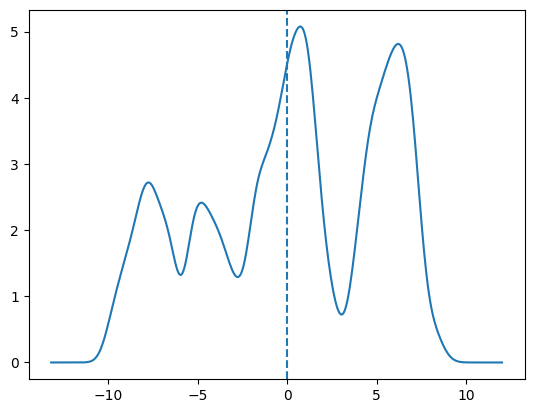

In [40]:
plt.plot(energies, dos)
plt.axvline(x=0, ls='--')

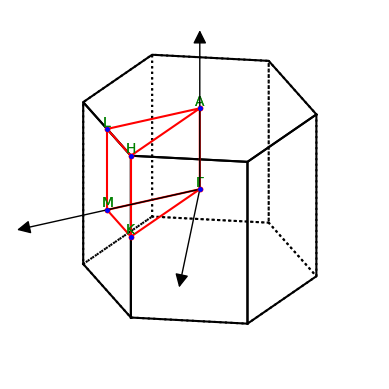

HEX(a=2.62054, c=2.46635)
  Variant name: HEX
  Special point names: GMKALH
  Default path: GMKGALHA,LM,KH

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    M   0.5000  0.0000  0.0000
    K   0.3333  0.3333  0.0000
    A   0.0000  0.0000  0.5000
    L   0.5000  0.0000  0.5000
    H   0.3333  0.3333  0.5000



In [32]:
lat = si.cell.get_bravais_lattice()
lat.plot_bz(show=True)
print(lat.description())

In [41]:
path = si.cell.bandpath('GMKGALHA,LM,KH',npoints=61)

In [42]:
band = si.calc.get_band_structure(qe_options, kpts=path, reference=efermi)

(-16.0, 8.0)

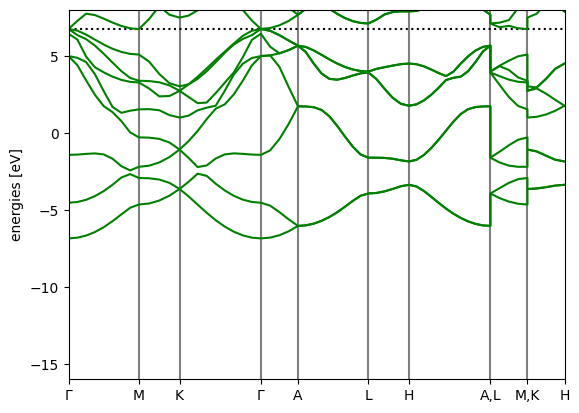

In [43]:
bp=band.plot()
bp.set_ylim(-16,8)

In [ ]:
        k = [match for match in D if "Kinetic energy" in match]
        KS_KE = str(k).split()[6]
ks_ke.append(KS_KE)
np.save('/home/valeria/Documents/DFTPY/cWT-KEDF/Phases/DATA/Si_bct5/DATA2/ks_ke.npy', np.asarray(ks_ke))